# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

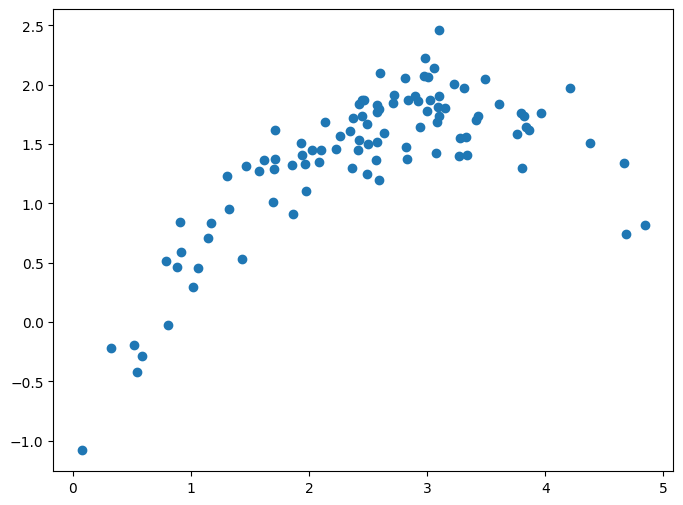

In [39]:
X = np.expand_dims(np.random.normal(size=100, loc=2.5), axis=0).T
y = -0.3 * (X.T[0] - 3.1)**2 + 1.8 + np.random.normal(size=100, scale=0.25)

plt.figure(figsize=(8, 6))
plt.scatter(X.T[0], y)
plt.show()

# Model

In [11]:
class PolynomialFeatures:
    def __init__(self, degree=2, include_bias=True) -> None:
        self.degree = degree
        self.include_bias = include_bias
        self.n_featues = None
        self.X_poly_lst = None

    def fit(self, X):
        _, n_featues = X.shape
        self.n_featues = n_featues

    def transform(self, X):
        n_samples, n_featues = X.shape
        if self.n_featues != n_featues:
            print("Incorrect matrix shape.")

        self.X_poly_lst = []

        self._calcFeaturesPower(degree=self.degree, base_factor=np.ones(n_samples), factors=X.T)

        return np.array(self.X_poly_lst).T

    def _calcFeaturesPower(self, degree, base_factor, factors):
        if degree != self.degree or self.include_bias == True:
            self.X_poly_lst.append(base_factor)

        if degree == 0:
            return

        for i in range(factors.shape[0]):
            self._calcFeaturesPower(degree=degree-1, base_factor=base_factor*factors[i], factors=factors[i:])

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Train

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

linReg = LinearRegression()
linReg.fit(X_train_poly, y_train)

LinearRegression()

# Evaluate

In [44]:
from sklearn.metrics import mean_squared_error

y_pred = linReg.predict(X_test_poly).reshape((-1))

mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.2f}\nRMSE: {:.2f}".format(
    mse,
    np.sqrt(mse)
))

MSE: 0.05
RMSE: 0.23


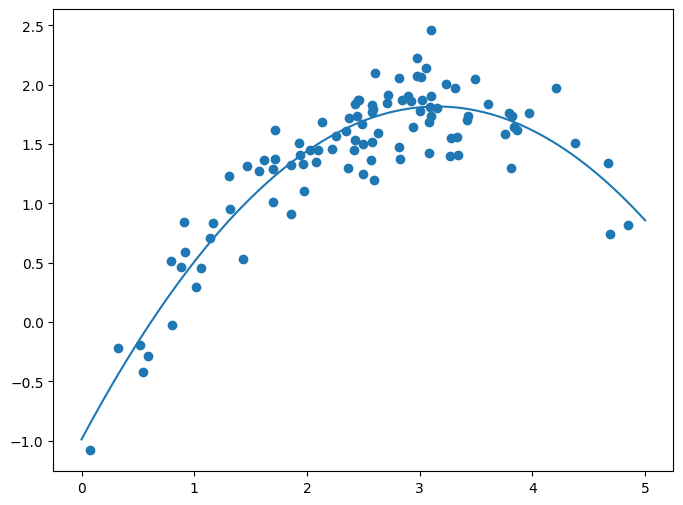

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X.T[0], y)
plt.plot(
    np.linspace(0, 5, 100),
    linReg.predict(poly.transform(np.linspace(0, 5, 100).reshape((-1, 1))))
)
plt.show()